# Gender Bias Test Protocol

In [186]:
!pip install tabulate

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

### Creating the Dataset
You should first execute the notebook that performs the automated labeling of the Simmons Institute playlist (under the name Simmons.ipynb) and import the corresponding JSON file into the current notebook. Once this is done, you need to transform the said JSON into a dataset. Here, I suggest converting it into CSV format (comma-separated) and then proceed with normal work. It should be noted, therefore, that the following cell is to be executed only once, and be careful to change the name if you are working with different names. You also need to create an empty CSV file and import it into the current notebook with the name 'database_SIMMONS.csv'.

In [188]:
import json
import csv

def json_to_csv_with_duration(json_file_path, csv_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    csv_data = [['ID','Title' ,'Gender', 'Total Talk Duration','Total Talk Duration in min', 'Total Interruption Duration','Total Interruption Duration in min', 'Number of Interruptions',
                 'Total Interruption Duration (M)', 'Total Interruption Duration (F)', 'Number of Interruptions (M)',
                 'Number of Interruptions (F)']]
    
    total_interruption_duration_m = 0
    total_interruption_duration_f = 0
    num_interruptions_m = 0
    num_interruptions_f = 0

    for i, item in enumerate(data, start=1):
        total_interruption_duration = sum([interruption[1] - interruption[0] for interruption in item['interruptions']])
        total_talk_duration = item['end'] - item['start']
        interruption_duration_m = 0
        interruption_duration_f = 0
        interruptions_m = 0
        interruptions_f = 0
        for interruption in item['interruptions']:
            if interruption[2] == 'M':
                interruption_duration_m += interruption[1] - interruption[0]
                interruptions_m += 1
            else :
                interruption_duration_f += interruption[1] - interruption[0]
                interruptions_f += 1
        total_interruption_duration_m += interruption_duration_m
        total_interruption_duration_f += interruption_duration_f
        num_interruptions_m += interruptions_m
        num_interruptions_f += interruptions_f

        row = [i, item['path'][0],item['gender'], total_talk_duration,total_talk_duration/60, total_interruption_duration,
               total_interruption_duration/60,item['num_interruptions'], interruption_duration_m, interruption_duration_f,
               interruptions_m, interruptions_f]
        csv_data.append(row)
    with open(csv_file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(csv_data)

json_file_path = '/Users/ossamafaraji/Desktop/PLEASEBEFINAL.json'
csv_file_path = '/Users/ossamafaraji/Desktop/Dataset.csv'
json_to_csv_with_duration(json_file_path, csv_file_path)

In [189]:
df=pd.read_csv('/Users/ossamafaraji/Desktop/Dataset.csv', sep=',' ,index_col='ID' )
df.drop(df[df['Number of Interruptions'] > 100].index, inplace = True)
df.head(10) 

,Title,Gender,Total Talk Duration,Total Talk Duration in min,Total Interruption Duration,Total Interruption Duration in min,Number of Interruptions,Total Interruption Duration (M),Total Interruption Duration (F),Number of Interruptions (M),Number of Interruptions (F)
ID,,,,,,,,,,,
1,Locality II,F,2639.0,43.983333,61,1.016667,11,61,0,11,0
2,Probabilistic and Cominatorial Methods III,M,3794.0,63.233333,92,1.533333,14,92,0,14,0
3,Quantum LDPC Codes II,M,3635.0,60.583333,265,4.416667,40,265,0,40,0
4,Algebraic Codes/Algorithms I,F,3695.0,61.583333,102,1.700000,15,102,0,15,0
5,Probabilistic and Cominatorial Methods II,M,3541.0,59.016667,19,0.316667,4,19,0,4,0
6,Recent Advances in LTCs,M,4014.0,66.900000,93,1.550000,7,93,0,7,0
7,Polar Codes,M,2496.0,41.600000,39,0.650000,6,39,0,6,0
8,Intro to Quantum Codes,M,3925.0,65.416667,96,1.600000,16,93,3,15,1
9,Polar Codes II,M,3294.0,54.900000,69,1.150000,12,69,0,12,0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 1 to 656
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Title                               609 non-null    object 
 1   Gender                              609 non-null    object 
 2   Total Talk Duration                 609 non-null    float64
 3   Total Talk Duration in min          609 non-null    float64
 4   Total Interruption Duration         609 non-null    int64  
 5   Total Interruption Duration in min  609 non-null    float64
 6   Number of Interruptions             609 non-null    int64  
 7   Total Interruption Duration (M)     609 non-null    int64  
 8   Total Interruption Duration (F)     609 non-null    int64  
 9   Number of Interruptions (M)         609 non-null    int64  
 10  Number of Interruptions (F)         609 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usa

Nombre total des conférences  563


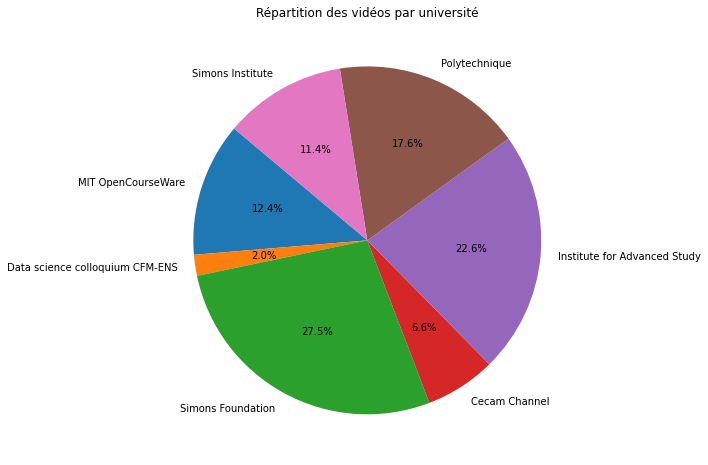

In [191]:
import matplotlib.pyplot as plt
videos_by_university = {}

with open('/Users/ossamafaraji/Downloads/Uni_origine.txt', 'r') as file:
    for line in file:
        last_space_index = line.rfind(' ')
        university = line[:last_space_index].strip()
        num_videos = int(line[last_space_index:].strip())
        videos_by_university[university] = videos_by_university.get(university, 0) + num_videos
total_videos = sum(videos_by_university.values())
print("Nombre total des conférences ", total_videos)
percentages = {university: (num_videos / total_videos) * 100 for university, num_videos in videos_by_university.items()}
plt.figure(figsize=(8, 8))
plt.pie(percentages.values(), labels=percentages.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Répartition des vidéos par université')
plt.show()

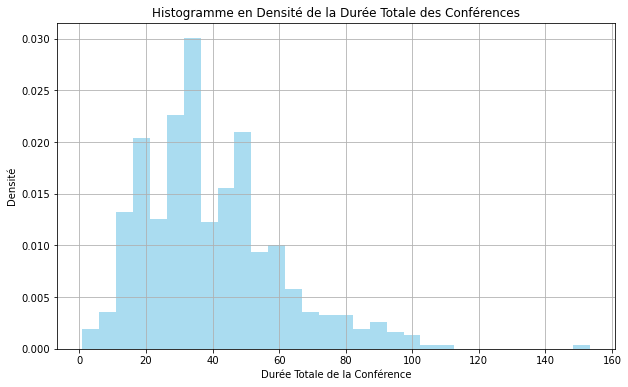

In [192]:
plt.figure(figsize=(10, 6))
plt.hist(df['Total Talk Duration in min'], bins=30, density=True, color='skyblue', alpha=0.7)
plt.title('Histogramme en Densité de la Durée Totale des Conférences')
plt.xlabel('Durée Totale de la Conférence')
plt.ylabel('Densité')
plt.grid(True)
plt.show()

### Adding relevant variables

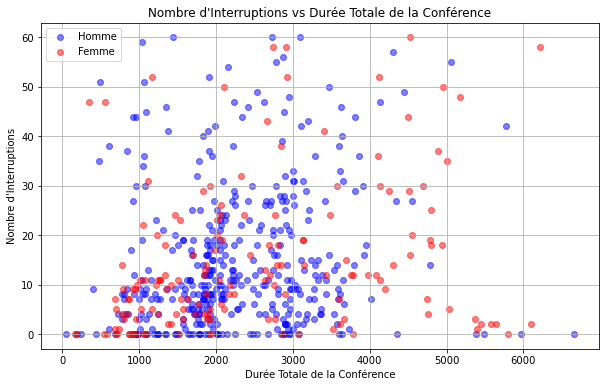

In [195]:
# Élimination des valeurs aberrantes
Q1 = df['Number of Interruptions'].quantile(0.25)
Q3 = df['Number of Interruptions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Number of Interruptions'] >= lower_bound) & (df['Number of Interruptions'] <= upper_bound)]

df_male = df_filtered[df_filtered['Gender'] == 'M']
df_female = df_filtered[df_filtered['Gender'] == 'F']

plt.figure(figsize=(10, 6))
plt.scatter(df_male['Total Talk Duration'], df_male['Number of Interruptions'], color='blue', alpha=0.5, label='Homme')

plt.scatter(df_female['Total Talk Duration'], df_female['Number of Interruptions'], color='red', alpha=0.5, label='Femme')

plt.title('Nombre d\'Interruptions vs Durée Totale de la Conférence')
plt.xlabel('Durée Totale de la Conférence')
plt.ylabel('Nombre d\'Interruptions')
plt.grid(True)
plt.legend()
plt.show()

#### La durée totale de la conférence influence-t-elle le nombre d'interruptions ?

In [196]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-196-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Total Talk Duration,Total Talk Duration in min,Total Interruption Duration,Total Interruption Duration in min,Number of Interruptions,Total Interruption Duration (M),Total Interruption Duration (F),Number of Interruptions (M),Number of Interruptions (F)
Total Talk Duration,1.000000,1.000000,0.149549,0.149549,0.204651,0.196612,0.029079,0.220624,0.088233
Total Talk Duration in min,1.000000,1.000000,0.149549,0.149549,0.204651,0.196612,0.029079,0.220624,0.088233
Total Interruption Duration,0.149549,0.149549,1.000000,1.000000,0.813707,0.905837,0.788300,0.645952,0.684957
Total Interruption Duration in min,0.149549,0.149549,1.000000,1.000000,0.813707,0.905837,0.788300,0.645952,0.684957
Number of Interruptions,0.204651,0.204651,0.813707,0.813707,1.000000,0.737490,0.640858,0.877464,0.720951
Total Interruption Duration (M),0.196612,0.196612,0.905837,0.905837,0.737490,1.000000,0.453419,0.713565,0.435696
Total Interruption Duration (F),0.029079,0.029079,0.788300,0.788300,0.640858,0.453419,1.000000,0.322655,0.808310
Number of Interruptions (M),0.220624,0.220624,0.645952,0.645952,0.877464,0.713565,0.322655,1.000000,0.300224
Number of Interruptions (F),0.088233,0.088233,0.684957,0.684957,0.720951,0.435696,0.808310,0.300224,1.000000


On remarque qu'il n'y a pas de corrélation remarquable entre la durée totale d'une conférence et le nombre d'interruptions, ce qui relève d'un fait naturel : plus la conférence est longue plus les spéctateurs se désinteressen et ne posent plus de questions, les interruptions sont donc concentrées dans "la première heure" de la conférence. 

In [197]:
df['Interruption %'] = df['Total Interruption Duration'] / df['Total Talk Duration']
df['Frequence of interruption'] = df['Number of Interruptions'] / df['Total Talk Duration']

In [198]:
df['AVG interruption']=df['Total Interruption Duration'] / df['Number of Interruptions'] # The average duration of an interruption"
df['AVG interruption'] = df['AVG interruption'].fillna(0) # for the null values 

In [225]:
df.head(10)

,Title,Gender,Total Talk Duration,Total Talk Duration in min,Total Interruption Duration,Total Interruption Duration in min,Number of Interruptions,Total Interruption Duration (M),Total Interruption Duration (F),Number of Interruptions (M),Number of Interruptions (F),Interruption %,Frequence of interruption,AVG interruption,Rang Interruption %,Var_categorielles,Var_categorielles_nombre
ID,,,,,,,,,,,,,,,,,
1,Locality II,F,2639.0,43.983333,61,1.016667,11,61,0,11,0,0.023115,0.004168,5.545455,96,2,2_n
2,Probabilistic and Cominatorial Methods III,M,3794.0,63.233333,92,1.533333,14,92,0,14,0,0.024249,0.003690,6.571429,101,2,2_n
3,Quantum LDPC Codes II,M,3635.0,60.583333,265,4.416667,40,265,0,40,0,0.072902,0.011004,6.625000,253,3,3_n
4,Algebraic Codes/Algorithms I,F,3695.0,61.583333,102,1.700000,15,102,0,15,0,0.027605,0.004060,6.800000,116,2,2_n
5,Probabilistic and Cominatorial Methods II,M,3541.0,59.016667,19,0.316667,4,19,0,4,0,0.005366,0.001130,4.750000,21,1,1_n
6,Recent Advances in LTCs,M,4014.0,66.900000,93,1.550000,7,93,0,7,0,0.023169,0.001744,13.285714,97,2,1_n
7,Polar Codes,M,2496.0,41.600000,39,0.650000,6,39,0,6,0,0.015625,0.002404,6.500000,60,1,2_n
8,Intro to Quantum Codes,M,3925.0,65.416667,96,1.600000,16,93,3,15,1,0.024459,0.004076,6.000000,102,2,2_n
9,Polar Codes II,M,3294.0,54.900000,69,1.150000,12,69,0,12,0,0.020947,0.003643,5.750000,88,2,2_n


### Relevant Plots

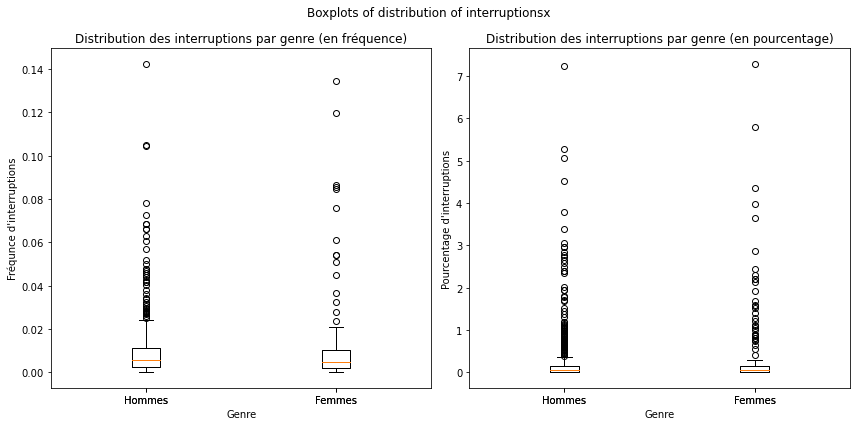

In [200]:
# Boxplots of distribution of interruptions

Male = df[df['Gender'] == 'M']['Frequence of interruption']
Female = df[df['Gender'] == 'F']['Frequence of interruption']

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
fig.suptitle('Boxplots of distribution of interruptionsx')

axs[0].boxplot([Male, Female], labels=['Hommes', 'Femmes'])
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Fréqunce d\'interruptions')
axs[0].set_title('Distribution des interruptions par genre (en fréquence)')


Male_frequency = df[df['Gender'] == 'M']['Interruption %']
Female_frequency = df[df['Gender'] == 'F']['Interruption %']
axs[1].boxplot([Male_frequency, Female_frequency], labels=['Hommes', 'Femmes'])
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Pourcentage d\'interruptions')
axs[1].set_title('Distribution des interruptions par genre (en pourcentage)')

plt.tight_layout()
plt.show()

De première vue, nous voyons que les médianes des deux distributions sont à peu près au meme niveau. Nous allons vérifier par la suite, par des tests statistiques plus pertinents, si ces deux distributions sont réellement semblables.

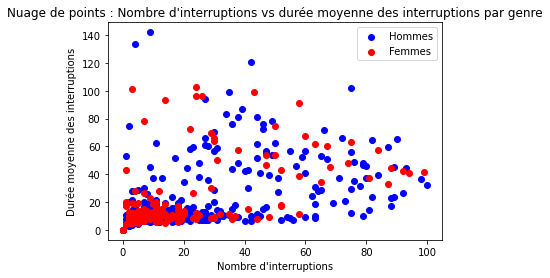

In [201]:
# Here, we plot the average duration of an interruption as a function of the number of interruptions. 
#The top-right quadrant signifies both a high number of interruptions and a long duration for each interruption.
#Finding women in this quadrant would be a strong indicator of bias.
hommes = df[df['Gender'] == 'M']
femmes = df[df['Gender'] == 'F']

plt.scatter(hommes['Number of Interruptions'], hommes['AVG interruption'], color='blue', label='Hommes')
plt.scatter(femmes['Number of Interruptions'], femmes['AVG interruption'], color='red', label='Femmes')

plt.xlabel('Nombre d\'interruptions')
plt.ylabel('Durée moyenne des interruptions')
plt.title('Nuage de points : Nombre d\'interruptions vs durée moyenne des interruptions par genre')

plt.legend()
plt.show()

Ce graphe a été réalisé pour explorer la relation entre la durée moyenne des interruptions et le nombre total d'interruptions. Ainsi, si nous observons une concentration dans le quadrant en haut à droite, cela signifie que la catégorie en question subit de nombreuses interruptions, et celles-ci durent généralement plus longtemps. Mis à part quelques valeurs aberrantes, cette situation n'est pas très fréquente. Par conséquent, nous avons envisagé que, étant donné que le système détecte principalement les interruptions les plus brèves, le nombre d'interruptions pourrait ne pas être une mesure pertinente. Certaines interruptions pourraient ne pas être des interruptions à proprement parler, mais plutôt des commentaires ponctuant la discussion avec le conférencier, tels que "oui", "c'est plus clair maintenant", "Qu'en est-il de l'autre cas", etc.

Cette réflexion nous a alors conduit à examiner la durée moyenne des interruptions en fonction de la durée totale de la conférence. Nous pensons en effet que plus la conférence est longue, moins les participants restent attentifs à la fin et posent moins de questions, sauf s'il existe un biais et qu'ils cherchent à poser des questions simplement pour prolonger la durée de l'événement.

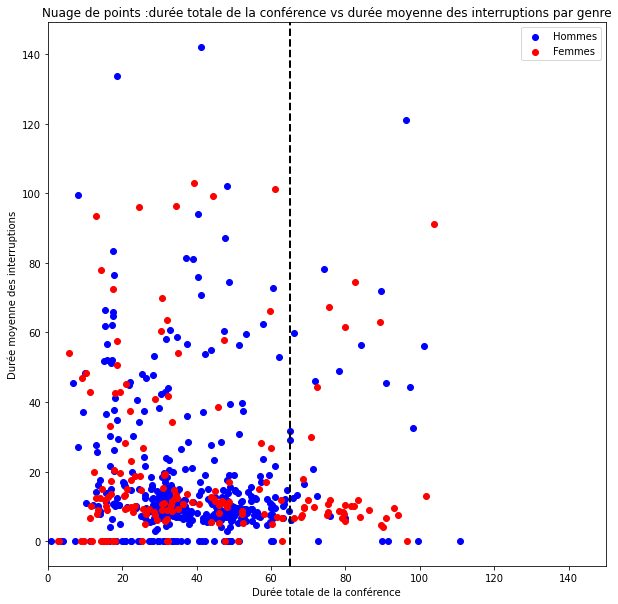

In [202]:
plt.figure(figsize=(10, 10))
plt.scatter(hommes['Total Talk Duration']/60, hommes['AVG interruption'], color='blue', label='Hommes')
plt.scatter(femmes['Total Talk Duration']/60, femmes['AVG interruption'], color='red', label='Femmes')
plt.xlabel('Durée totale de la conférence')
plt.ylabel('Durée moyenne des interruptions')
plt.axvline(x=65, color='black', linestyle='--', linewidth=2)
plt.xlim(0, 150)
plt.title('Nuage de points :durée totale de la conférence vs durée moyenne des interruptions par genre')

plt.legend()
plt.show()

Ce graphe attire notre attention sur le fait que plusieurs conférences n'ont pas eu d'interruptions. On va essayer de voir la proportion de ce type de conférences parmi les femmes et les hommes.

In [203]:
nombre_conferences_hommes = hommes.shape[0]
nombre_conferences_femmes = femmes.shape[0]
nombre_conferences_sans_interruption = len(df[df['Number of Interruptions'] == 0])
nombre_conferences_sans_interruption_femmes = len(df[(df['Number of Interruptions'] == 0) & (df['Gender'] == 'F')])
nombre_conferences_sans_interruption_hommes = len(df[(df['Number of Interruptions'] == 0) & (df['Gender'] == 'M')])
pourcentage_sans_interruption = (nombre_conferences_sans_interruption / df.shape[0]) * 100
pourcentage_sans_interruption_femmes = (nombre_conferences_sans_interruption_femmes / nombre_conferences_femmes) * 100
pourcentage_sans_interruption_hommes = (nombre_conferences_sans_interruption_hommes / nombre_conferences_hommes) * 100


In [204]:
from tabulate import tabulate

resultats = {
    "Catégorie": ["Total", "Femmes", "Hommes"],
    "Nombre de conférences": [df.shape[0], nombre_conferences_femmes, nombre_conferences_hommes],
    "Sans interruption": [nombre_conferences_sans_interruption, nombre_conferences_sans_interruption_femmes, nombre_conferences_sans_interruption_hommes],
    "Pourcentage sans interruption (%)": ["{:.2f}".format(pourcentage_sans_interruption), "{:.2f}".format(pourcentage_sans_interruption_femmes), "{:.2f}".format(pourcentage_sans_interruption_hommes)]
}
print(tabulate(resultats, headers="keys", tablefmt="fancy_grid"))

╒═════════════╤═════════════════════════╤═════════════════════╤═════════════════════════════════════╕
│ Catégorie   │   Nombre de conférences │   Sans interruption │   Pourcentage sans interruption (%) │
╞═════════════╪═════════════════════════╪═════════════════════╪═════════════════════════════════════╡
│ Total       │                     609 │                  76 │                               12.48 │
├─────────────┼─────────────────────────┼─────────────────────┼─────────────────────────────────────┤
│ Femmes      │                     173 │                  22 │                               12.72 │
├─────────────┼─────────────────────────┼─────────────────────┼─────────────────────────────────────┤
│ Hommes      │                     436 │                  54 │                               12.39 │
╘═════════════╧═════════════════════════╧═════════════════════╧═════════════════════════════════════╛


Là encore, nous ne détectons aucun biais dans "l'absence d'interruptions". Les conférenciers hommes et femmes ont les memes pourcentages de conférences sans interruptions.

### Test de MannWhitney 

On commence par appliquer le test de Mann-Whiteney pour le pourcentage que représente la durée totale des interruptions en fonction de la durée totale de la conférence. Parce que comme évoqué avant on remarque que c'est une donnée plus pertinent que la fréquence des interruptions, et on va s'intéresser à la deuxième peut être juste pour prouver ce point.
 

In [205]:
# On rajoute la colonne du Rang 
df['Rang Interruption %'] = df['Interruption %'].rank(method='dense').astype(int)

Hypothèse nulle : il n'y a pas de différence (en termes de tendance centrale) entre les deux groupes de la population.

Hypothèse alternative : il existe une différence (en termes de tendance centrale) entre les deux groupes de la population.

Les seules hypothèses pour réaliser un
test de Mann-Whitney sont que les deux groupes
doivent être indépendants et que la variable dépendante
est ordinale ou numérique (continue).
Cependant, pour que la différence entre les groupes soit rapportée sous forme de médiane, la forme de l'histogramme est nécessaire.
entre les groupes sous forme de médianes, la forme des distributions de la variable dépendante par groupe est nécessaire.
distribution de la variable dépendante par groupe
doivent être similaires.

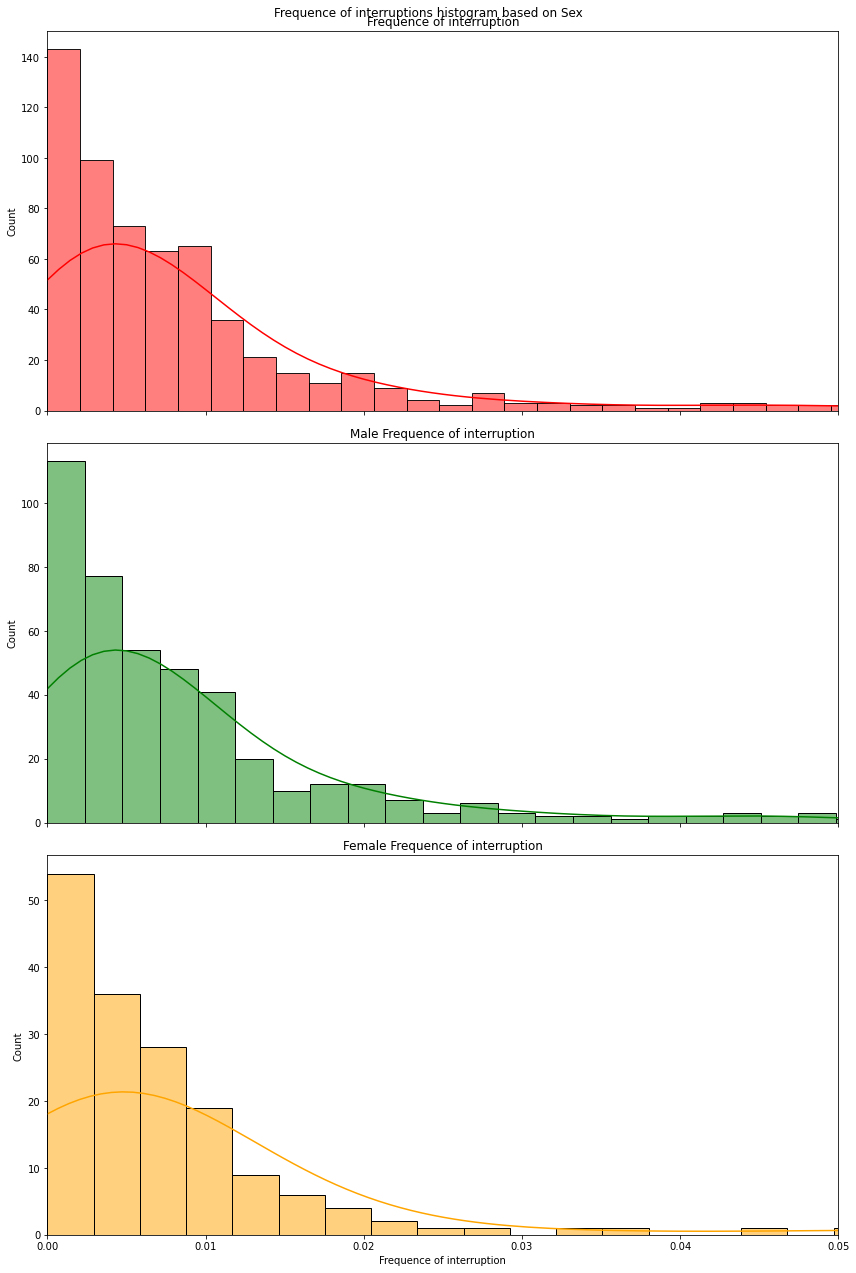

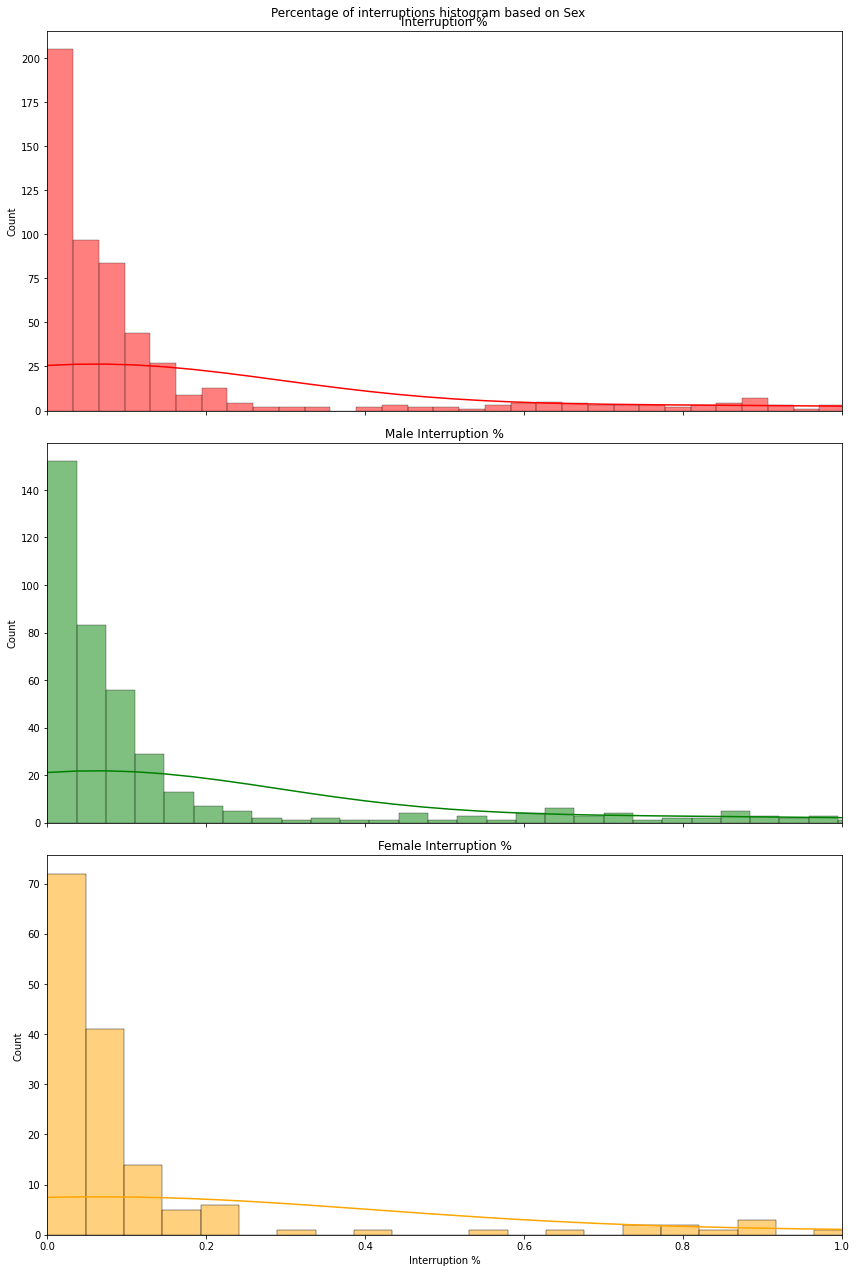

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
fig.suptitle('Frequence of interruptions histogram based on Sex')


sns.histplot(df['Frequence of interruption'], ax=axs[0], kde=True, color='red')
axs[0].set_title('Frequence of interruption')

sns.histplot(df[df['Gender']=='M']['Frequence of interruption'], ax=axs[1], kde=True, color='green')
axs[1].set_title('Male Frequence of interruption')

sns.histplot(df[df['Gender']=='F']['Frequence of interruption'], ax=axs[2], kde=True, color='orange')
axs[2].set_title('Female Frequence of interruption')
axs[0].set_xlim(0,0.05)
axs[1].set_xlim(0,0.05)
axs[2].set_xlim(0,0.05)
plt.tight_layout()
plt.show()


fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
fig.suptitle('Percentage of interruptions histogram based on Sex')

sns.histplot(df['Interruption %'], ax=axs[0], kde=True, color='red')
axs[0].set_title('Interruption %')

sns.histplot(df[df['Gender']=='M']['Interruption %'], ax=axs[1], kde=True, color='green')
axs[1].set_title('Male Interruption %')

sns.histplot(df[df['Gender']=='F']['Interruption %'], ax=axs[2], kde=True, color='orange')
axs[2].set_title('Female Interruption %')
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)
plt.tight_layout()
plt.show()


In [207]:
Male_frequency= df[df['Gender'] == 'M']['Interruption %']
Female_frequency=df[df['Gender'] == 'F']['Interruption %']
statistic, p_value = mannwhitneyu(Male_frequency, Female_frequency)
n = len(Male_frequency)
m = len(Female_frequency)
expected_u = (n * m) / 2
sigma_u = (n * m * (n + m + 1)) / 12 ** 0.5
z_value = (u_statistic - expected_u) / sigma_u


In [208]:
print("Statistique de test de Mann-Whitney pour le pourcentage d'interruptions:", statistic)
print("p-Valeur associée :", p_value)
print("Valeur de z calculée :", z_value)

Statistique de test de Mann-Whitney pour le pourcentage d'interruptions: 38448.0
p-Valeur associée : 0.7076921702178925
Valeur de z calculée : -0.0011400172883665387


In [209]:
Male_frequency= df[df['Gender'] == 'M']['Frequence of interruption']
Female_frequency=df[df['Gender'] == 'F']['Frequence of interruption']
statistic, p_value = mannwhitneyu(Male_frequency, Female_frequency)
n = len(Male_frequency)
m = len(Female_frequency)
expected_u = (n * m) / 2
sigma_u = (n * m * (n + m + 1)) / 12 ** 0.5
z_value = (u_statistic - expected_u) / sigma_u

In [210]:
print("Statistique de test de Mann-Whitney pour la fréquence d'interruptions :", statistic)
print("p-Valeur associée :", p_value)
print("Valeur de z calculée :", z_value)

Statistique de test de Mann-Whitney pour la fréquence d'interruptions : 39616.0
p-Valeur associée : 0.33103736257522687
Valeur de z calculée : -0.0011400172883665387



#### Conclusion

Dans le cadre de notre étude sur les interruptions, nous avons effectué deux tests de Mann-Whitney U pour comparer les distributions des interruptions entre les groupes concernant la fréquence et le pourcentage d'interruptions.

Pour la fréquence d'interruptions, nous avons obtenu une statistique de test de Mann-Whitney \( U \) de 39616.0 avec une p-valeur associée de \( p = 0.331 \). La valeur calculée de \( z \) est de \( z = -0.0011 \). De même, pour le pourcentage d'interruptions, nous avons obtenu une statistique de test de Mann-Whitney de 38448.0 avec une p-valeur associée de \( p = 0.708 \) et une valeur calculée de \( z = -0.0011 \).

En utilisant un seuil de signification \( \alpha = 0.05 \), la région d'acceptation pour chaque test de Mann-Whitney U est l'intervalle \([ -1.96, 1.96 ]\) pour un test bilatéral. Dans les deux cas, les valeurs calculées de \( z \) (-0.0011) se situent à l'intérieur de cette région d'acceptation. Par conséquent, nous ne pouvons pas rejeter l'hypothèse nulle selon laquelle il n'y a pas de différence significative entre les groupes en ce qui concerne la fréquence ou le pourcentage d'interruptions.

Ainsi, sur la base des résultats de nos tests, nous concluons qu'il n'y a pas suffisamment de preuves pour affirmer qu'il existe une différence significative dans la fréquence ou le pourcentage d'interruptions entre les femmes et les hommes.



### Test du Chi-2

Pour ce test, nous avons besoin d'un tableau de contingence qui croise le sexe du locuteur principal avec la fréquence d'interruption, mais par catégories. Définir des intervalles de catégories lors d'une étude statistique dont on n'a pas de connaissances préalables est arbitraire ; on opte donc pour une catégorisation basée sur les quartiles de la distribution. Toutefois, cette approche peut être quelque peu erronée, en particulier si les points de données sont très proches les uns des autres.

In [211]:
 df['Var_categorielles']=pd.qcut(df['Interruption %'], 4, labels=['1','2','3','4']) # Defining Category intervals 

In [212]:
# Test avec la fréquence d'interruptions
contingency_table = pd.crosstab(df['Gender'], df['Var_categorielles'])
print(contingency_table)

Var_categorielles    1    2    3    4
Gender                               
F                   44   45   41   43
M                  109  107  111  109


In [213]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Valeur de chi carré :", chi2)
print("p valeur associée :", p_value)
print("Degrés de liberté :", dof)

Valeur de chi carré : 0.27116493086881205
p valeur associée : 0.9653570991119085
Degrés de liberté : 3


In [214]:
df['Var_categorielles_nombre']=pd.qcut(df['Frequence of interruption'], 4, labels=['1_n','2_n','3_n','4_n'])

In [215]:
# Test avec le nombre d'interruptions 
contingency_table_freq = pd.crosstab(df['Gender'], df['Var_categorielles_nombre'])

print(contingency_table_freq)

Var_categorielles_nombre  1_n  2_n  3_n  4_n
Gender                                      
F                          47   43   44   39
M                         106  109  108  113


In [216]:
chi2_freq, p_value_freq, dof_freq, expected_freq = chi2_contingency(contingency_table_freq)
print("Valeur de chi carré :", chi2_freq)
print("p valeur associée :", p_value_freq)
print("Degrés de liberté :", dof_freq)

Valeur de chi carré : 0.989816103717551
p valeur associée : 0.8037161402569011
Degrés de liberté : 3


Rappels : La valeur de chi carré mesure l'écart entre les fréquences observées et les fréquences attendues sous l'hypothèse nulle. Plus la valeur de chi carré est élevée, plus il est improbable que les différences observées soient dues au hasard.

La p-valeur mesure la probabilité d'observer des résultats aussi extrêmes que ceux observés si l'hypothèse nulle (pas de différence entre les groupes) est vraie. Si la p-valeur est inférieure à un seuil prédéfini (généralement 0.05), on rejette l'hypothèse nulle en faveur de l'hypothèse alternative (il y a une différence significative entre les groupes).

On conclut en raison des p-valeurs élevées observées qu'il n'y a pas de différence significative entre les groupes en termes de fréquence d'interruption pour les deux tests. Cela signifie que, selon ces tests, il n'y a pas de preuve statistique d'un biais de genre dans les interruptions lors des conférences, en tenant compte des considérations et des tests effectués.

In [217]:
# Test de Chi_2 pour regarder l influence du genre des gens qui interrompent 
total_interruptions_femmes = df['Total Interruption Duration (F)'].sum()/df[df['Gender'] == 'F']['Total Talk Duration'].sum()
total_interruptions_hommes = df['Total Interruption Duration (M)'].sum()/df[df['Gender'] == 'M']['Total Talk Duration'].sum()


### Conclusion 
L'échnatillon étant très petit (encore trop petit après avoir enlevé les Undefined), on ne peut donc pas encore parler d'un vrai test statistique. Quoique, le squelette de ce qu'il faut faire est là il faudra juste l'appliquer une fois on a plus de données. Dans une première approche on s'est pas intéressée au genre de la personne qui interrompt (aussi l'on avait pas cette info sur ce dataset), notre prochaine étape serait de définir le test pour prendre cela en considération

In [218]:
Interruptions_femmes_aux_femmes = df[df['Gender'] == "F"]['Number of Interruptions (F)'].sum()
Interruptions_femmes_aux_hommes = df[df['Gender'] == "M"]['Number of Interruptions (F)'].sum()
Interruptions_hommes_aux_hommes = df[df['Gender'] == "M"]['Number of Interruptions (M)'].sum()
Interruptions_hommes_aux_femmes = df[df['Gender'] == "F"]['Number of Interruptions (M)'].sum()

data = [
    ["Conférencier/Interrupteur", "Homme", "Femme", "Total"],
    ["Homme", Interruptions_hommes_aux_hommes, Interruptions_femmes_aux_hommes, Interruptions_hommes_aux_hommes + Interruptions_femmes_aux_hommes], 
    ["Femme", Interruptions_hommes_aux_femmes, Interruptions_femmes_aux_femmes, Interruptions_femmes_aux_femmes + Interruptions_hommes_aux_femmes],
    ["Total", Interruptions_hommes_aux_hommes + Interruptions_hommes_aux_femmes, Interruptions_femmes_aux_hommes + Interruptions_femmes_aux_femmes, Interruptions_hommes_aux_hommes + Interruptions_femmes_aux_hommes + Interruptions_hommes_aux_femmes + Interruptions_femmes_aux_femmes]
]

# Affichage du tableau
print(tabulate(data, headers=[], tablefmt="fancy_grid"))

╒═══════════════════════════╤═══════╤═══════╤═══════╕
│ Conférencier/Interrupteur │ Homme │ Femme │ Total │
├───────────────────────────┼───────┼───────┼───────┤
│ Homme                     │ 6150  │ 2893  │ 9043  │
├───────────────────────────┼───────┼───────┼───────┤
│ Femme                     │ 1840  │ 1523  │ 3363  │
├───────────────────────────┼───────┼───────┼───────┤
│ Total                     │ 7990  │ 4416  │ 12406 │
╘═══════════════════════════╧═══════╧═══════╧═══════╛


$$
\begin{aligned}
& E=\frac{\text { row total } \times \text { column total }}{n} \\
& E_{\text {Men }, \text { Men }}=\frac{9043 \times 7990}{12406}=5824.0827 \\
& E_{\text {Men }, \text { Women }}=\frac{9043 \times 4416}{12406}=3218.9173 \\
& E_{\text {Women, Men }}=\frac{3363 \times 7990}{12406}=2165.9173 \\
& E_{\text {Women, Women}}=\frac{3363 \times 4416}{12406}=1197.0827
\end{aligned}
$$

In [219]:
data = [
    ["Conférencier/Interrupteur", "Homme", "Femme", "Total"],
    ["Homme", str(Interruptions_hommes_aux_hommes) + "( Exp : 5824.0827)", str(Interruptions_femmes_aux_hommes) + '(Exp : 3218.9173)', Interruptions_hommes_aux_hommes + Interruptions_femmes_aux_hommes], 
    ["Femme", str(Interruptions_hommes_aux_femmes)+"(Exp : 2165.9173)", str(Interruptions_femmes_aux_femmes) + '(Exp : 1197.0827)', Interruptions_femmes_aux_femmes + Interruptions_hommes_aux_femmes],
    ["Total", Interruptions_hommes_aux_hommes + Interruptions_hommes_aux_femmes, Interruptions_femmes_aux_hommes + Interruptions_femmes_aux_femmes, Interruptions_hommes_aux_hommes + Interruptions_femmes_aux_hommes + Interruptions_hommes_aux_femmes + Interruptions_femmes_aux_femmes]
]

# Affichage du tableau
print(tabulate(data, headers=[], tablefmt="fancy_grid"))

╒═══════════════════════════╤════════════════════════╤═══════════════════════╤═══════╕
│ Conférencier/Interrupteur │ Homme                  │ Femme                 │ Total │
├───────────────────────────┼────────────────────────┼───────────────────────┼───────┤
│ Homme                     │ 6150( Exp : 5824.0827) │ 2893(Exp : 3218.9173) │ 9043  │
├───────────────────────────┼────────────────────────┼───────────────────────┼───────┤
│ Femme                     │ 1840(Exp : 2165.9173)  │ 1523(Exp : 1197.0827) │ 3363  │
├───────────────────────────┼────────────────────────┼───────────────────────┼───────┤
│ Total                     │ 7990                   │ 4416                  │ 12406 │
╘═══════════════════════════╧════════════════════════╧═══════════════════════╧═══════╛


$$
\begin{aligned}
\chi^2 & =\sum \frac{(O-E)^2}{E} \\
\chi^2 & =\frac{(6150-5824.0827)^2}{5824.0827}+\frac{(2893-3218.9173)^2}{3218.9173}+\frac{(1840-2165.9173)^2}{2165.9173}+\frac{(1523-1197.0827)^2}{1197.0827} \\

\chi^2 & = 18.24 + 32.99 + 49.04 + 88.73 
= 189
\end{aligned}
$$

Le statistique du test du chi-carré est 189, 

$$
df=(\text { nombre de lignes }-1)(\text { nombre de colonnes }-1)=(2-1)(2-1)=1
$$


In [220]:
from scipy.stats import chi2

# Chi-square test statistic
chi2_observed = ((6150 - 5824.0827)**2 / 5824.0827) + ((2893 - 3218.9173)**2 / 3218.9173) + ((1840 - 2165.9173)**2 / 2165.9173) + ((1523 - 1197.0827)**2 / 1197.0827)

# Degrees of freedom
degrees_f = 1

# Calculate p-value
p_value = 1 - chi2.cdf(chi2_observed, degrees_f)

print("Le p-value pour une statistique de test du chi-2 de", chi2_observed, "avec", degrees_f, "degrés de liberté est approximativement:", p_value)


Le p-value pour une statistique de test du chi-2 de 189.01441051359777 avec 1 degrés de liberté est approximativement: 0.0


### Test du Chi-Carré pour l'Association entre le Genre du Conférencier et le Genre de l'Interrupteur

#### Hypothèses :

- $H_0$ : Hypothèse Nulle : Il n'y a pas d'association entre le genre du conférencier et le genre de l'interrupteur.
- $H_1$ : Hypothèse Alternative : Il y a une association entre le genre du conférencier et le genre de l'interrupteur.

#### Méthode :

Nous avons utilisé un test du Chi-Carré pour évaluer l'association entre le genre du conférencier et le genre de l'interrupteur. Les données comprennent les fréquences observées de chaque combinaison de genre de conférencier et de genre d'interrupteur.

#### Résultats :

Nous avons obtenu une statistique de test du Chi-Carré de $\chi^2 = 189$ avec $df = 1$ (degrés de liberté). La p-valeur associée à ce test est très proche de zéro ($p < 0.001$).

#### Conclusion :

Étant donné que la p-valeur ($p < 0.001$) est inférieure à notre seuil de signification ($\alpha = 0.05$), nous rejetons l'hypothèse nulle. Nous concluons donc qu'il existe une association significative entre le genre du conférencier et le genre de l'interrupteur. 

### Test de Fisher

Il est à noter que le test du Chi-carré est moins approprié lorsque les fréquences observées sont grandes, car il repose sur l'approximation de la distribution chi-carré par une distribution normale. Cette approximation peut ne pas être valable lorsque les fréquences observées sont grandes.

Lorsque les fréquences observées sont grandes, une alternative plus appropriée est le test de Fisher exact, c'est ce à quoi nous allons avoir recours comme dernier test de biais.

### Calculs pour le Test Exact de Fisher

#### 1. Fréquences Attendues :
$$
\begin{aligned}
& E_{\text {Men }, \text { Men }}=5824.0827 \\
& E_{\text {Men }, \text { Women }}=3218.9173 \\
& E_{\text {Women, Men }}=2165.9173 \\
& E_{\text {Women, Women}}=1197.0827
\end{aligned}
$$
#### 2. Odds Ratio :
$$
\begin{aligned}
 Odds Ratio = \frac{ad}{bc} = \frac{6150 \times 1523}{2893 \times 1840} \approx 1.067 
\end{aligned}

$$
#### 3. Test de l'Hypothèse Nulle :

Nous utilisons la librairie `scipy.stats` pour effectuer le test exact de Fisher.


In [221]:
from scipy.stats import fisher_exact

# Tableau de contingence
table = [[6150, 2893],
         [1840, 1523]]

odds_ratio, p_value = fisher_exact(table)

print("Odds Ratio:", odds_ratio)
print("P-value:", p_value)


Odds Ratio: 1.7595789687251087
P-value: 3.795764583982764e-42


#### Conclusion :

Là encore, la p-valeur ($p < 0.001$) est inférieure à notre seuil de signification ($\alpha = 0.05$). Nous concluons donc qu'il existe une association significative entre le genre du conférencier et le genre de l'interrupteur. En d'autres termes, le genre du conférencier semble influencer le genre de l'interrupteur.

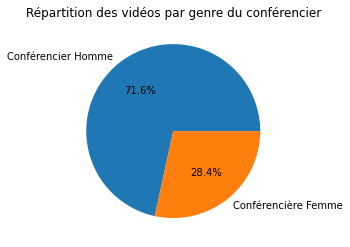

In [230]:
plt.pie([436,173], labels=["Conférencier Homme","Conférencière Femme"], autopct='%1.1f%%')
plt.title('Répartition des vidéos par genre du conférencier')
plt.show()